# Test Model

In [1]:
import os
os.chdir("./Models/CNN_model")
#!ls
from Model import Model,Optimizer_SGD
from Data import Data

os.chdir("../..")
!ls

from Models.MatrixScheduler.MatrixScheduler_identical import MatrixScheduler_identical
from Models.MatrixScheduler.MatrixScheduler_Uniform import MatrixScheduler_Uniform
from Models.FederatedLearning.Server import server

#os.chdir("../Reports")
import matplotlib.pyplot as plt
import numpy as np
#!ls

Archived  data	DataDistribution.ods  Model_Init.ipynb	Models


In [2]:
#OpenML/ ML flow

### Model

In [2]:
d = Data(split = "noSplit",n_workers=1)

Files already downloaded and verified
Files already downloaded and verified
1
1


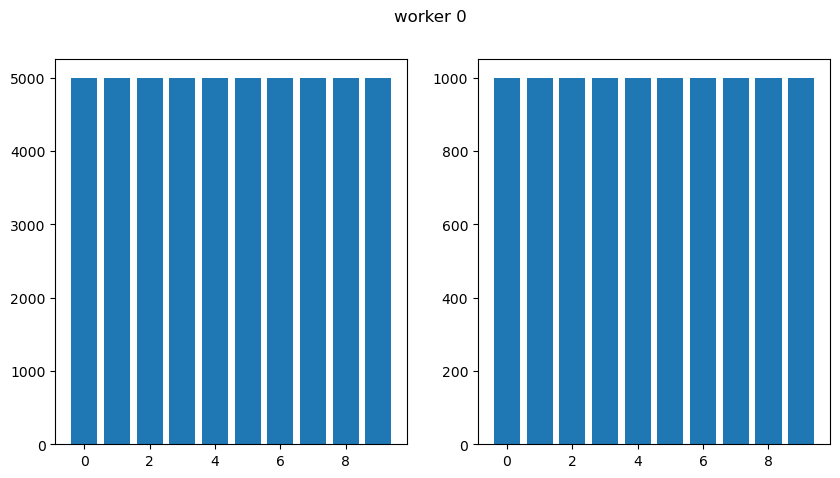

In [3]:
train,test = d.get_data()

plt.figure(figsize=(10, 5))
val,counts = np.unique(train[0].targets,return_counts = True)
val1,counts1 = np.unique(test[0].targets,return_counts = True)

plt.subplot(121)
plt.bar(val,counts)
plt.subplot(122)
plt.bar(val1,counts1)
plt.suptitle("worker 0")
plt.show()

In [5]:
m = Model("Model")
trainloader = d.get_data_loaders()[0]['trainloader']
testloader = d.get_data_loaders()[0]['testloader']

m.run(epoch = 200,train_loader = trainloader,test_loader = testloader)

KeyboardInterrupt: 

## Federated learning

### Identical split, running with update on each iteration

In [3]:
def model_creator():
    name = "FederatedModel"

    model = Model(name)
    
    opt = Optimizer_SGD(params=model.net.parameters())
    preconditioner = None
    scaller = None
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [4]:
d = Data(split = "ident",n_workers=3)

Files already downloaded and verified
Files already downloaded and verified
1
1


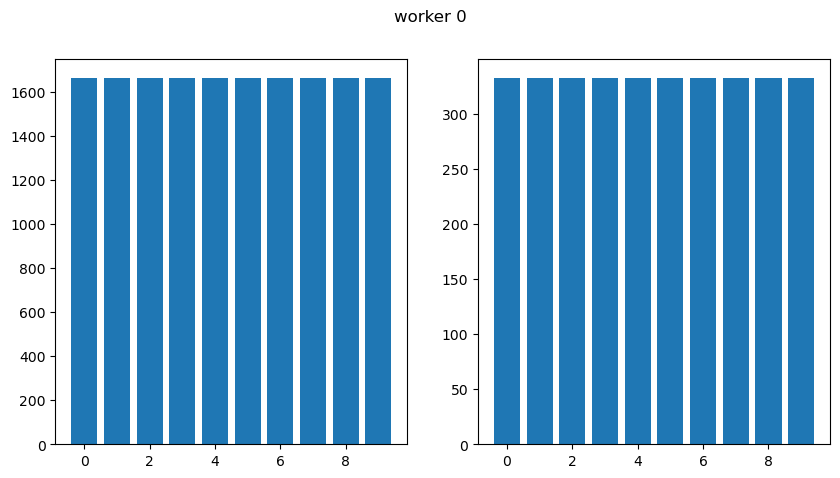

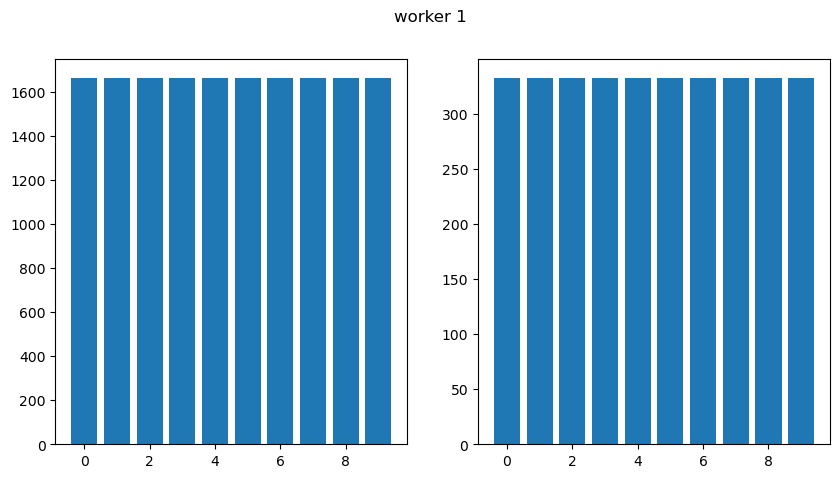

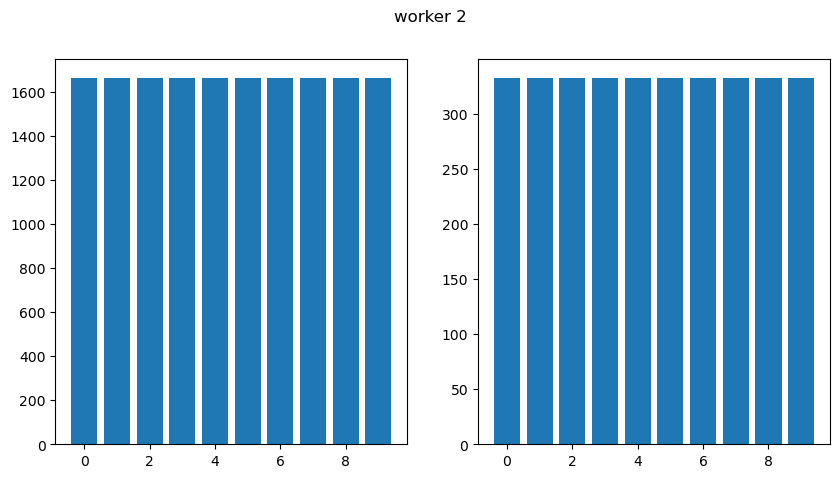

In [5]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [6]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=200,T=1)


KeyboardInterrupt: 

In [7]:
s.workers[0].model.stat_collector.loss[-1]
s.workers[0].model.stat_collector.accuracy[-1]
s.workers[0].model.stat_collector.loss_plot()
s.workers[0].model.stat_collector.acc_plot()

IndexError: list index out of range

### Identical split

In [12]:
def model_creator():
    name = "FederatedModel_ident"
    #opt = Optimizer_SGD()
    preconditioner = None
    scaller = None

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [9]:
d = Data(split = "ident",n_workers=3)

Files already downloaded and verified
Files already downloaded and verified
1
1


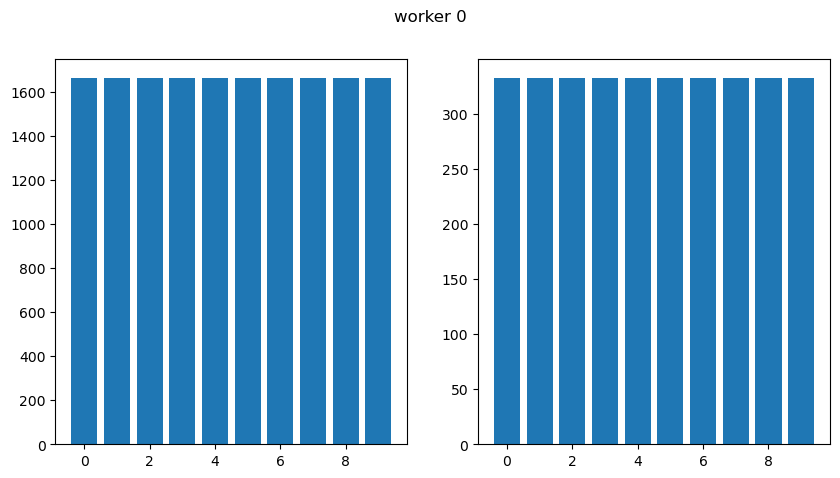

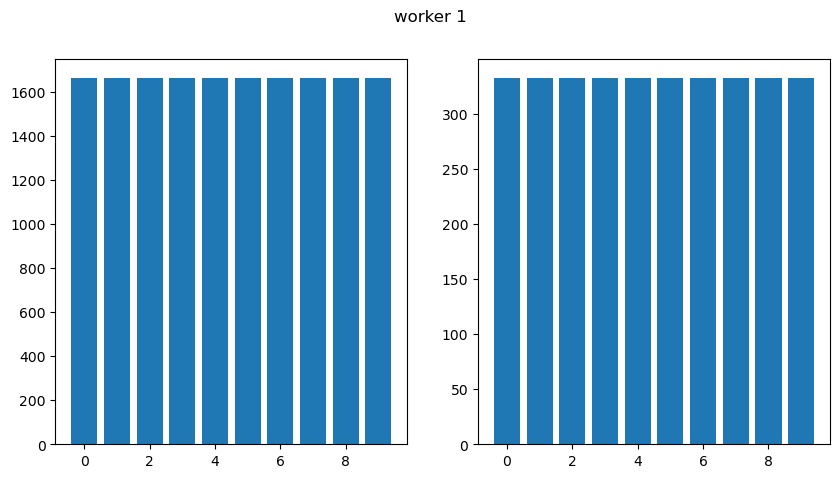

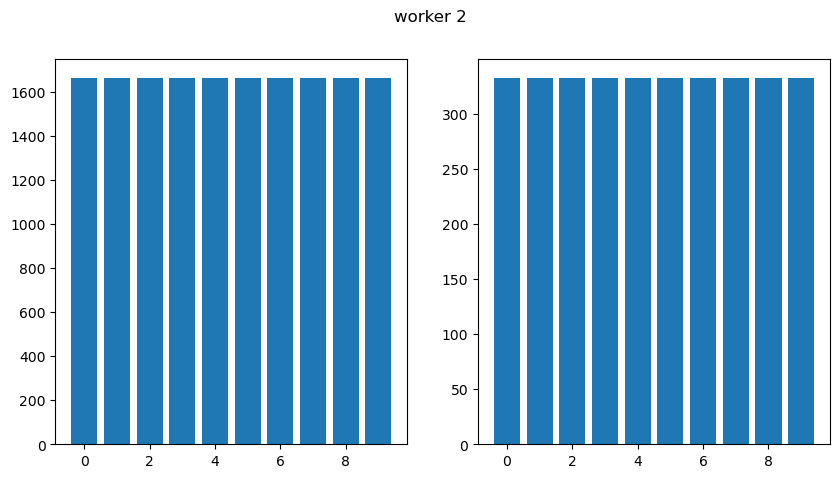

In [10]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [13]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=200,T=20)

KeyboardInterrupt: 

## Heterogenious

In [2]:
d = Data(split = "het",n_workers=3)

Files already downloaded and verified
Files already downloaded and verified
1
1


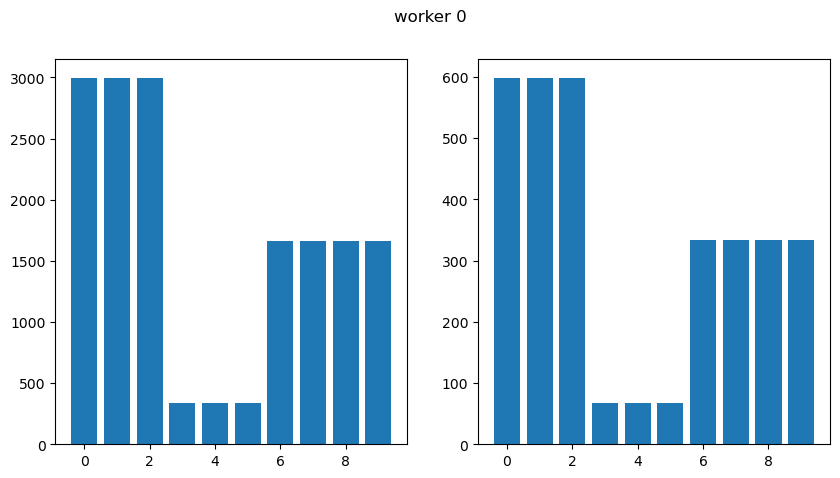

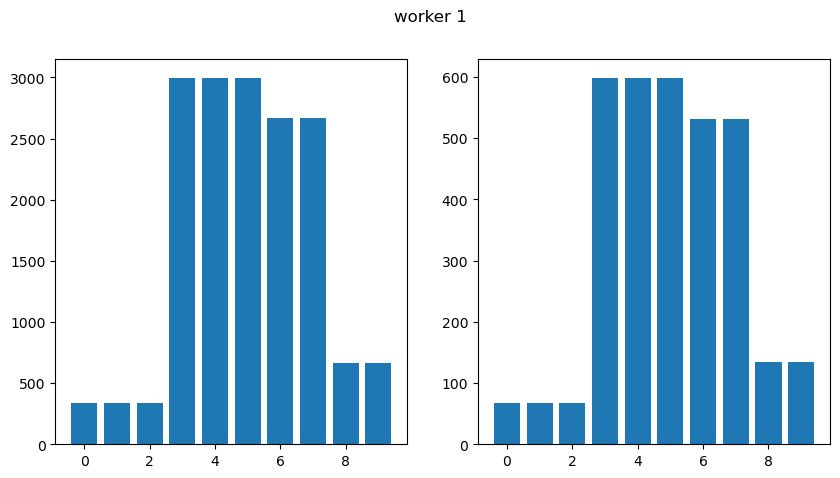

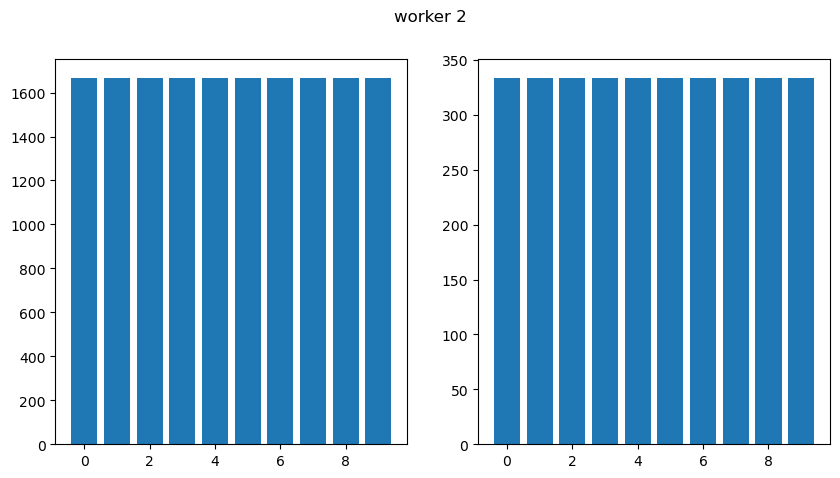

In [3]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [8]:
len(trains[0]),len(trains[1]),len(trains[2]),len(trains[0])+len(trains[1])+len(trains[2])

(16660, 16660, 16680, 50000)

In [9]:
len(tests[0]),len(tests[1]),len(tests[2]),len(tests[0])+len(tests[1])+len(tests[2])

(3330, 3330, 3340, 10000)

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=200,T=20)

### Scaller ident

In [45]:
def model_creator():
    name = "FederatedModel_ident"
    opt = Optimizer_SGD()
    preconditioner = None
    scaller = MatrixScheduler_Uniform(0.1,2,change_mode = MatrixScheduler_Uniform.change_on_each_global_update)

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    model.set_scaller(scaller)
    return model

In [43]:
d = Data(split = "ident",n_workers=3)

Files already downloaded and verified
Files already downloaded and verified
1
1


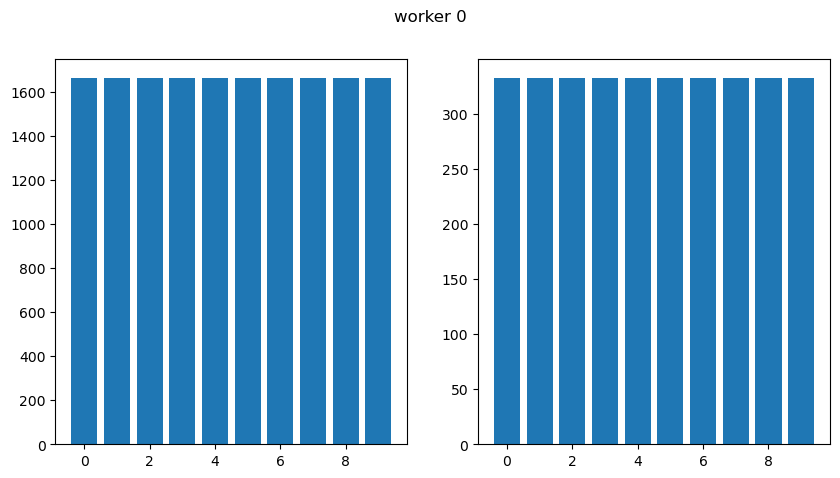

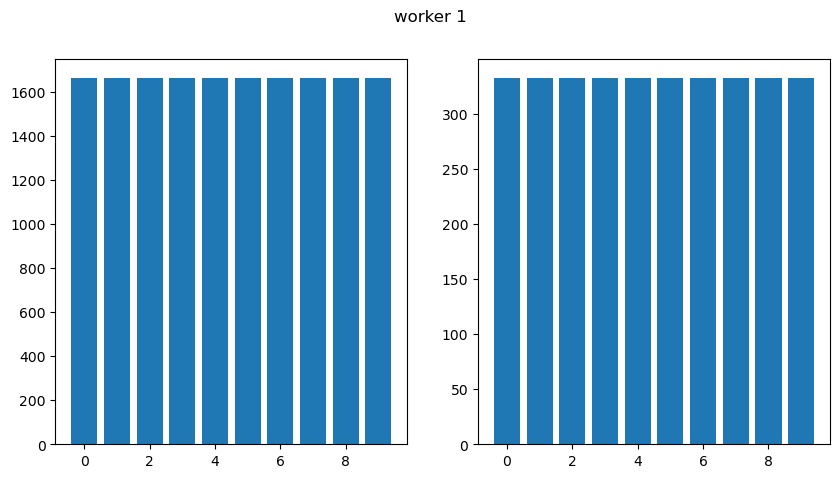

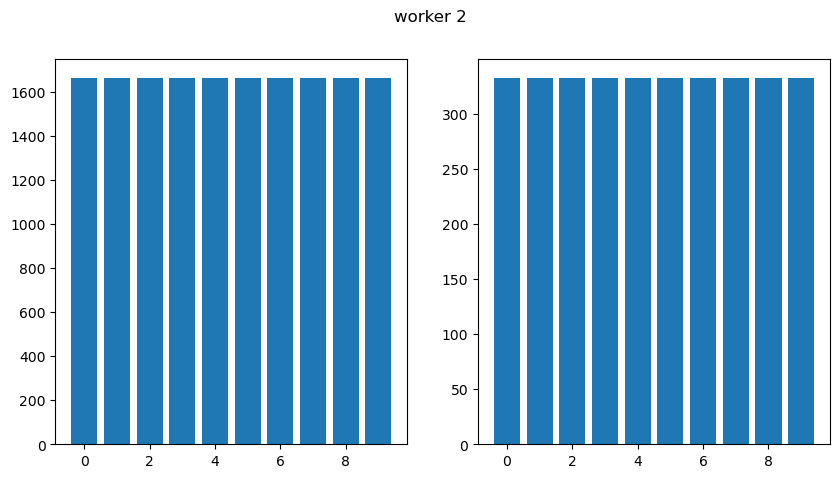

In [44]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=200,T=20)